In [34]:
import pandas as pd
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


In [35]:
df=pd.read_csv('pm.csv')

In [36]:
df['date']= pd.to_datetime(df['date'])

In [37]:
df

,TEMP,Hum,Year,Month,Hour,Value,Wind,date
0,27.042139,62.0625,2016,3,3,251.4,2.652545,2016-01-03 03:00:00
1,29.110712,62.0625,2016,3,4,246.0,3.885251,2016-01-03 04:00:00
2,29.883539,62.0625,2016,3,5,264.0,4.903973,2016-01-03 05:00:00
3,30.473932,62.0625,2016,3,6,256.8,6.708690,2016-01-03 06:00:00
4,30.945337,62.0625,2016,3,7,238.2,7.963866,2016-01-03 07:00:00
...,...,...,...,...,...,...,...,...
30151,16.730799,57.5000,2019,12,19,160.1,11.239508,2019-12-30 19:00:00
30152,15.977900,57.5000,2019,12,20,163.5,11.266323,2019-12-30 20:00:00
30153,15.328638,57.5000,2019,12,21,192.7,10.663340,2019-12-30 21:00:00
30154,14.792780,57.5000,2019,12,22,213.3,9.555317,2019-12-30 22:00:00


In [38]:
df.columns

Index(['TEMP', 'Hum', 'Year', 'Month', 'Hour', 'Value', 'Wind', 'date'], dtype='object')

In [39]:
df = df[['date', 'Value', 'TEMP', 'Hum','Wind']]

In [40]:
df.describe()

,Value,TEMP,Hum,Wind
count,30156.000000,30156.000000,30156.000000,30156.000000
mean,82.363762,26.029793,67.314156,15.552587
std,71.191298,4.365403,6.952617,7.929298
min,0.300000,8.877344,37.250000,0.768092
25%,32.200000,23.837061,63.375000,9.272838
50%,56.400000,26.823206,67.812500,14.733385
75%,111.600000,28.943758,72.000000,20.930596
max,739.700000,39.182182,89.000000,69.624955


In [41]:
df.columns

Index(['date', 'Value', 'TEMP', 'Hum', 'Wind'], dtype='object')

In [42]:
df=df.set_index('date')

In [43]:
dataset_columns = df.columns.tolist()
dataset_columns

['Value', 'TEMP', 'Hum', 'Wind']

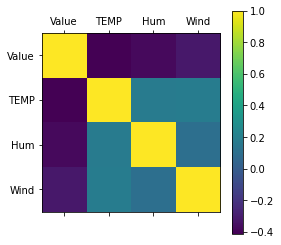

In [44]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,3] = encoder.fit_transform(values[:,3])
values = values.astype('float32')
values[:,3]

array([ 363., 1107., 1963., ..., 9463., 7926., 6080.], dtype=float32)

In [47]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [49]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [50]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (30152, 1)
X (30152, 4, 4)


In [51]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (21392, 4, 4)
X_test (8760, 4, 4)
Y_train (21392, 1)
Y_test (8760, 1)


In [52]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:
#Train the model
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
21392/21392 [==============================] - 13s 598us/step - loss: 0.0033
Epoch 2/20
21392/21392 [==============================] - 10s 487us/step - loss: 0.0015
Epoch 3/20
21392/21392 [==============================] - 11s 499us/step - loss: 0.0012
Epoch 4/20
21392/21392 [==============================] - 11s 500us/step - loss: 0.0011
Epoch 5/20
21392/21392 [==============================] - 11s 528us/step - loss: 0.0010
Epoch 6/20
21392/21392 [==============================] - 12s 544us/step - loss: 0.0010
Epoch 7/20
21392/21392 [==============================] - 11s 533us/step - loss: 9.7957e-04
Epoch 8/20
21392/21392 [==============================] - 11s 500us/step - loss: 9.5906e-04
Epoch 9/20
21392/21392 [==============================] - 11s 511us/step - loss: 9.4978e-04
Epoch 10/20
21392/21392 [==============================] - 10s 487us/step - loss: 9.8310e-04
Epoch 11/20
21392/21392 [==============================] - 11s 499us/step - loss: 9.5208e-04
Epoch 12/2

In [54]:
#Taking predictions
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')


In [55]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

0.019670127

In [56]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 4)
scaled Values shape (30156, 4)


In [57]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 4)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [58]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

14.544091

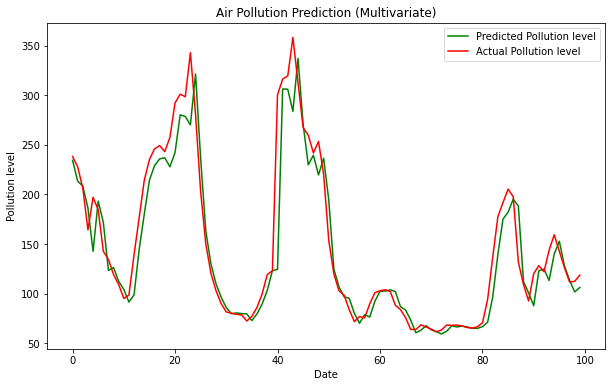

<Figure size 432x288 with 0 Axes>

In [60]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 14.544091
Mean of Test data  85.37593
